In [3]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
#Creating data
slay = 12.085
nepotism = 69

X = torch.arange(0, 50, 0.1).unsqueeze(dim=1) #remember to unsqueeze.
#Y is usually something that we found a correlation with. In this case, we are going to assume that
# the linear formula is a good fit.
Y = slay*X + nepotism

#split the data
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.3)


In [4]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.slay =  nn.Parameter(torch.randn(1, requires_grad=True)) #the slay factor parameter
        self.nepotism = nn.Parameter(torch.randn(1, requires_grad=True)) #how nepotism can boost them

        

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.slay * x + self.nepotism


In [5]:
#we can transform the above model to use layers instead of defining parameters bu ourselves.
class LinRegMod(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1, out_features=1)

    #overwriting the forward() function:
    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

torch.manual_seed(42)

#please call model only once. calling it again will reset the weights.
model = LinRegMod()

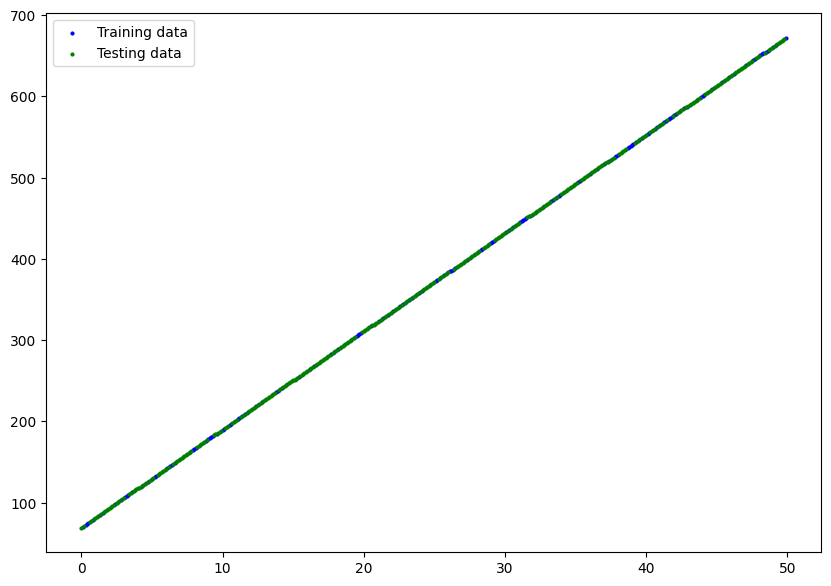

In [6]:
def plotPred(train_data=X_train, 
             train_labels=y_train,
             test_data=X_test,
             test_labels=y_test,
             predictions=None):
    plt.figure(figsize=(10,7))

    plt.scatter(train_data, train_labels, c='b', s=4, label="Training data")
    plt.scatter(test_data, test_labels, c='g', s=4, label="Testing data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", label = "Predictions")
    plt.legend(prop={"size":10})

plotPred()

In [16]:
#separate cell to define these functions first. we only need to call them once. 
#do not assign again.

#Setting loss function and optimizers.
#Since it's a linreg problem, we can use L1Loss & SGD for optim. 


loss_fn = nn.L1Loss()
optim = torch.optim.SGD(params=model.parameters(), lr=0.001) #setting the lr to 0.01 first, so that we dont need many epochs to train our data.

OrderedDict([('linear_layer.weight', tensor([[12.1752]])), ('linear_layer.bias', tensor([65.5837]))])
Epoch: 0 
Loss: 1.4463557004928589
OrderedDict([('linear_layer.weight', tensor([[12.1645]])), ('linear_layer.bias', tensor([65.9873]))])
Epoch: 1000 
Loss: 1.2754892110824585
OrderedDict([('linear_layer.weight', tensor([[12.1542]])), ('linear_layer.bias', tensor([66.3909]))])
Epoch: 2000 
Loss: 1.1027872562408447
OrderedDict([('linear_layer.weight', tensor([[12.1433]])), ('linear_layer.bias', tensor([66.7944]))])
Epoch: 3000 
Loss: 0.9336353540420532
OrderedDict([('linear_layer.weight', tensor([[12.1324]])), ('linear_layer.bias', tensor([67.1989]))])
Epoch: 4000 
Loss: 0.7631739974021912
OrderedDict([('linear_layer.weight', tensor([[12.1217]])), ('linear_layer.bias', tensor([67.6041]))])
Epoch: 5000 
Loss: 0.5916447043418884
OrderedDict([('linear_layer.weight', tensor([[12.1153]])), ('linear_layer.bias', tensor([68.0100]))])
Epoch: 6000 
Loss: 0.41545331478118896
OrderedDict([('linear_

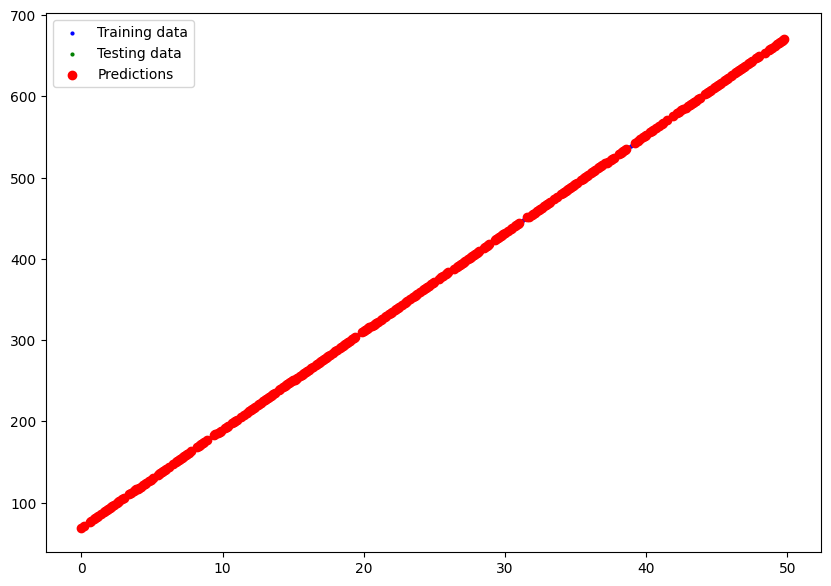

In [18]:
#new cell for training
epoch = 20000
for epoch in range(epoch):
    model.train()
    y_train_model = model(X_train)
    loss = loss_fn(y_train_model, y_train) #compares the predicted values with actual values, to determine the loss value
    
    optim.zero_grad() #clears the previous calculated gradients, if not it will acuumulate

    loss.backward() #calculates gradient. gotta be closer to 0!

    optim.step() #perform SGD


    #Testing!
    model.eval()
    with torch.inference_mode():
        y_test_model = model(X_test)
        loss = loss_fn(y_test_model, y_test)

        if epoch % 1000 == 0:

            print(model.state_dict())
            print(f'Epoch: {epoch} \nLoss: {loss}')
            
with torch.inference_mode():
    plotPred(predictions=model(X_test))


    



In [5]:
predictions = torch.tensor([1.2, 2.4, 3.6, 4.8])
labels = torch.tensor([1.0, 2.0, 3.0, 5.0])
loss_fn = nn.MSELoss()
loss_fn(predictions, labels)

tensor(0.1500)

In [13]:
mse = torch.mean((labels - predictions) ** 2)
mse

tensor(0.1500)